# CKP8366 - TÓPICOS AVANÇADOS - APRENDIZAGEM DE MÁQUINA PROBABILÍSTICA

<img  src="https://img.shields.io/badge/UFC_CKP8366-VAUX GOMES-000000?style=for-the-badge&logo=" /> <img src="https://img.shields.io/badge/Jupyter-000000?style=for-the-badge&logo=jupyter&logoColor=white" /> <img src="https://img.shields.io/badge/Python-000000?style=for-the-badge&logo=python&logoColor=white" />


In [1]:
#
import numpy as np
import matplotlib.pyplot as plt

## Regressão Linear

In [2]:
class BayesianLinearRegression:
  def __init__(self, alpha=10, epsilon=1):
    self.alpha = alpha
    self.epsilon = epsilon # TODO: Verificar se esta variável está corretamente nomeada

  def fit(self, X, y):
    # Adding Bias Column
    X = np.c_[np.ones((X.shape[0],1)), X] # (D x N)
    N = X.shape[1] # Bias included

    # Step 1: Prior
    self.m0 = np.zeros((N, 1))             # Mean: (N x 1)
    self.S0 = (self.alpha**-1) * np.eye(N) # Covavriance Matrix: (N x N)

    # Step 2: Posterior
    self.mu  = self.m0 + np.linalg.inv(self.S0 @ X.T @ X + (self.epsilon * np.eye(N))) @ self.S0 @ X.T @ (y - X @ self.m0) # Mean: (N x 1)
    self.cov = self.S0 - np.linalg.inv(self.S0 @ X.T @ X + (self.epsilon * np.eye(N))) @ self.S0 @ X.T @ X @ self.S0       # Covariance Matrix: (N x N)
      
  def predict(self, X, use_prior=False):
    # Addind Bias Column
    X = np.c_[np.ones((X.shape[0],1)), X] # (D x N)
    D = X.shape[0] # Bias included
    
    # Base
    mean = self.mu  if not use_prior else self.m0 # Coefficients
    cov  = self.cov if not use_prior else self.S0
    
    print(X.shape, mean.shape, cov.shape)
    
    # Prediction
    pred = X @ mean # (N x 1)
    var  = X @ cov @ X.T
    noise = self.epsilon * np.eye(D)
    
    return pred, var, var + noise
  
  def __str__(self):
    return f'BayesianLinearRegression: \n(alpha → {self.alpha}) (epsilon → {self.epsilon}) \n(coefs → {self.mu.ravel() if hasattr(self, "mu") else None})'

#### Carregamento dos dados

In [ ]:
# Data
data = np.genfromtxt('./files/linear_regression_data.csv', delimiter=',')

# Separation
X = data[:, :-1]
y = data[:, -1:]

# Normalization (Z-score)
mean = np.mean(X, axis=0)
std  = np.std(X, axis=0)
X = (X - mean) / std

#
X.shape, y.shape

#### Training

In [ ]:
# Training
bregr = BayesianLinearRegression(alpha=.1, epsilon=2.5)
%time bregr.fit(X, y)

#### Prior

In [ ]:
# Prior
X_test = np.linspace(X.min(), X.max(), 100)
preds  = bregr.predict(X_test.reshape((100, 1)), use_prior=True)

y_hat = preds[0].ravel()
cov   = np.diag(preds[1])
noise = np.diag(preds[2])

# Debug
# print(len(preds), y_hat.shape, cov.shape, noise.shape)

# Plot
plt.fill_between(X_test, y_hat + (2 * np.sqrt(noise)), y_hat - (2 * np.sqrt(noise)), alpha=0.15, label='Noise')
plt.fill_between(X_test, y_hat + (2 * np.sqrt(cov)  ), y_hat - (2 * np.sqrt(cov)  ), alpha=0.15, label='Variance')
plt.plot(X_test, y_hat, label='Prior')
plt.scatter(X, y, label="Train", color="black") # Real data

plt.xlabel('X')
plt.ylabel('y')
plt.title(bregr)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

#### Posteriori

<div class="alert alert-block alert-info">NOTE: Escalas Diferentes e reuso do ruído</div>

In [ ]:
# Posteriori
X_test = np.linspace(X.min(), X.max(), 100)
preds  = bregr.predict(X_test.reshape((100, 1)), use_prior=False)

y_hat = preds[0].ravel()
cov   = np.diag(preds[1])
noise = np.diag(preds[2])

# Debug
# print(len(preds), y_hat.shape, cov.shape, noise.shape)

# Plot
plt.fill_between(X_test, y_hat + (2 * np.sqrt(noise)), y_hat - (2 * np.sqrt(noise)), alpha=0.15, label='Noise')
plt.fill_between(X_test, y_hat + (2 * np.sqrt(cov)  ), y_hat - (2 * np.sqrt(cov)  ), alpha=0.15, label='Variance')
plt.plot(X_test, y_hat, label='Posteriori')
plt.scatter(X, y, label="Train", color="black") # Real data


plt.xlabel('X')
plt.ylabel('y')
plt.title(bregr)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

## Regressão Polinomial

> Dessa vez eu não usarei PolynomialFeatures 😂

In [3]:
def build_polynom(X, order=2):
  output = X.copy()
  
  for d in range(2, order + 1):
    output = np.c_[output, X**d]
    
  return output


#### Carregamento dos dados

In [27]:
ORDER = 6

# Data
data = np.genfromtxt('./files/polynomial_regression_data.csv', delimiter=',')

# Separation
X = data[:, :-1]
y = data[:, -1:]

# Build polynom
polyX = build_polynom(X, order=ORDER)
#
X.shape, y.shape, polyX.shape

((10, 1), (10, 1), (10, 6))

#### Training

In [28]:
# Training
bregr = BayesianLinearRegression(alpha=.1, epsilon=2.5)
%time bregr.fit(polyX, y)

CPU times: user 433 µs, sys: 55 µs, total: 488 µs
Wall time: 669 µs


#### Prior

(100, 7) (7, 1) (7, 7)


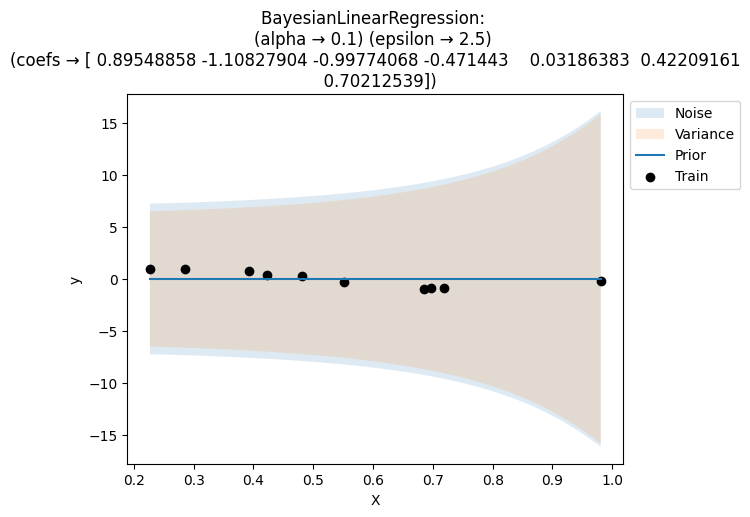

In [29]:
# Prior
X_test = np.linspace(X.min(), X.max(), 100)
polyX_test = build_polynom(np.linspace(X.min(), X.max(), 100), order=ORDER)
preds  = bregr.predict(polyX_test, use_prior=True)

y_hat = preds[0].ravel()
cov   = np.diag(preds[1])
noise = np.diag(preds[2])

# Debug
# print(len(preds), y_hat.shape, cov.shape, noise.shape, X_test.shape)

# Plot
plt.fill_between(X_test, y_hat + (2 * np.sqrt(noise)), y_hat - (2 * np.sqrt(noise)), alpha=0.15, label='Noise')
plt.fill_between(X_test, y_hat + (2 * np.sqrt(cov)  ), y_hat - (2 * np.sqrt(cov)  ), alpha=0.15, label='Variance')
plt.plot(X_test, y_hat, label='Prior')
plt.scatter(X, y, label="Train", color="black") # Real data

plt.xlabel('X')
plt.ylabel('y')
plt.title(bregr)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

#### Posteriori

<div class="alert alert-block alert-warning">Escalas Diferentes e Reuso do Ruído</div>

(100, 7) (7, 1) (7, 7)


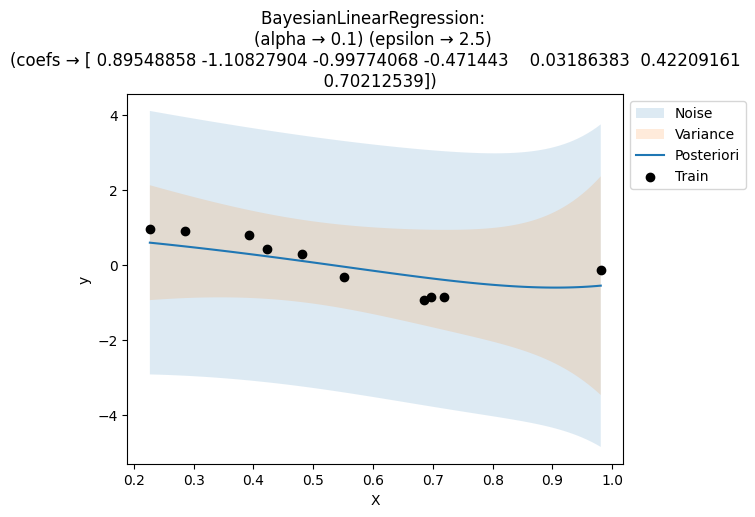

In [30]:
# Prior
X_test = np.linspace(X.min(), X.max(), 100)
polyX_test = build_polynom(np.linspace(X.min(), X.max(), 100), order=ORDER)
preds  = bregr.predict(polyX_test, use_prior=False)

y_hat = preds[0].ravel()
cov   = np.diag(preds[1])
noise = np.diag(preds[2])

# Debug
# print(len(preds), y_hat.shape, cov.shape, noise.shape)

# Plot
plt.fill_between(X_test, y_hat + (2 * np.sqrt(noise)), y_hat - (2 * np.sqrt(noise)), alpha=0.15, label='Noise')
plt.fill_between(X_test, y_hat + (2 * np.sqrt(cov)  ), y_hat - (2 * np.sqrt(cov)  ), alpha=0.15, label='Variance')
plt.plot(X_test, y_hat, label='Posteriori')
plt.scatter(X, y, label="Train", color="black") # Real data

plt.xlabel('X')
plt.ylabel('y')
plt.title(bregr)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()